In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [3]:
from datetime import datetime

In [5]:
df=pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [82]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Region,state
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,Northeast,Mature Estate
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,Northeast,Mature Estate
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,Northeast,Mature Estate
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,Northeast,Mature Estate
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,Northeast,Mature Estate


In [ ]:
desc=pd.DataFrame(index=df.columns)
desc['dtype']=df.dtypes
desc['null']=df.isna().sum()
desc['nunique']=df.nunique()
desc=pd.concat([desc,df.describe().T],axis=1)


In [93]:
df['month']=pd.to_datetime(df['month'])



In [8]:
desc

,dtype,null,nunique,count,mean,std,min,25%,50%,75%,max
month,object,0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
town,object,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flat_type,object,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block,object,0,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,object,0,566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
storey_range,object,0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_area_sqm,float64,0,172,182233.0,97.138748,24.028183,31.0,82.0,93.0,112.0,249.0
flat_model,object,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lease_commence_date,int64,0,55,182233.0,1996.024041,14.051445,1966.0,1985.0,1996.0,2010.0,2020.0
remaining_lease,object,0,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df._get_numeric_data()

,floor_area_sqm,lease_commence_date,resale_price
0,44.0,1979,232000.0
1,67.0,1978,250000.0
2,67.0,1980,262000.0
3,68.0,1980,265000.0
4,67.0,1980,265000.0
...,...,...,...
182228,146.0,1988,800000.0
182229,142.0,1988,850000.0
182230,146.0,1986,790000.0
182231,146.0,1988,1000000.0


A Correlation Matrix of Resale Prices, Floor Area(sqm), lease_commence_date is shown below:

Text(0.5, 1.0, 'Correlation Between Numerical Features')

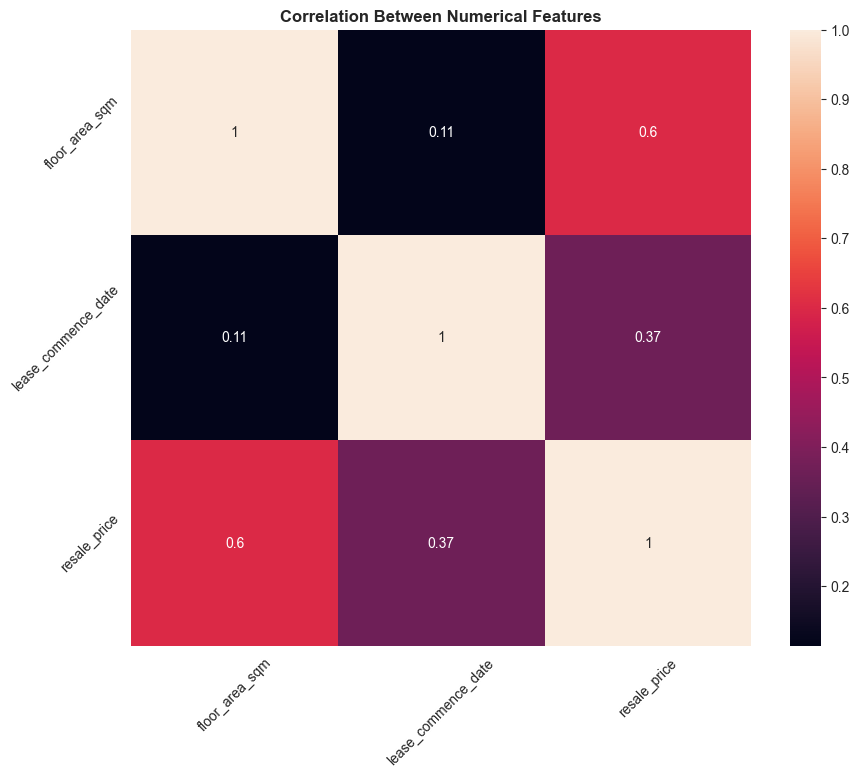

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Correlation Between Numerical Features',weight='bold')

1. What type of Resale Flat is the most popular in Singapore?

In [11]:
df['town']

0         ANG MO KIO
1         ANG MO KIO
2         ANG MO KIO
3         ANG MO KIO
4         ANG MO KIO
             ...    
182228        YISHUN
182229        YISHUN
182230        YISHUN
182231        YISHUN
182232        YISHUN
Name: town, Length: 182233, dtype: object

In [12]:
central_region = ["MARINE PARADE","BUKIT TIMAH","BISHAN","BUKIT MERAH","GEYLANG","KALLANG/WHAMPOA","QUEENSTOWN","TOA PAYOH","CENTRAL AREA"]
north_region = ["WOODLANDS","YISHUN","SEMBAWANG"]
northEast_region = ["ANG MO KIO","PUNGGOL","SERANGOON","SENGKANG","HOUGANG"]
east_region = ["BEDOK","TAMPINES","PASIR RIS"]
west_region = ["BUKIT BATOK","BUKIT PANJANG","CHOA CHU KANG","CLEMENTI","JURONG EAST","JURONG WEST"]

to_map={
    'Central':central_region,
    'North':north_region,
    'Northeast':north_region,
    'East':east_region,
    'West':west_region

}

def region_identifier(x):
    if x in central_region:
        return 'Central'
    elif x in north_region:
        return 'North'
    elif x in northEast_region:
        return 'Northeast'
    elif x in east_region:
        return 'East'
    elif x in west_region:
        return 'West'


df['Region']=df['town'].str.upper().map(region_identifier)

In [13]:
df['Region'].value_counts()

Region
Northeast    48637
West         41923
Central      34013
North        30372
East         27288
Name: count, dtype: int64

In [14]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Region
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,Northeast
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,Northeast
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,Northeast
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,Northeast
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...
182228,2024-06,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,63 years 03 months,800000.0,North
182229,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,63 years 01 month,850000.0,North
182230,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0,North
182231,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0,North


Text(0.5, 1.0, 'Figure 1: Resale Flats from each Town in Singapore from 2017-2024')

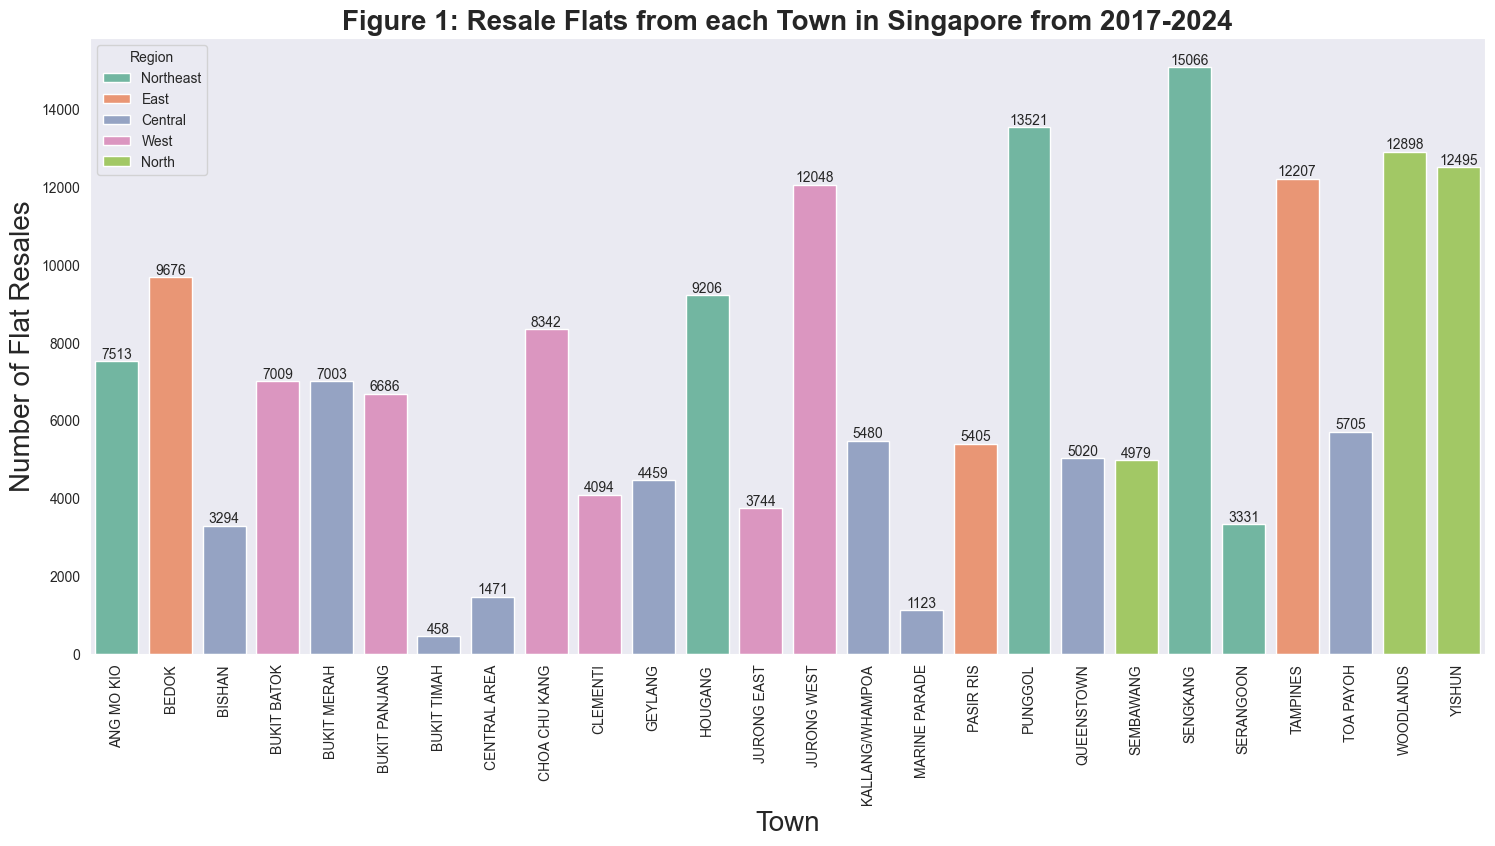

In [28]:
plt.figure(figsize=(18,8))
#style sets color background
sns.set_style("dark")
# params 2 sets the number of colors
g=sns.countplot(df,x='town',hue='Region',palette=sns.color_palette("Set2",5))
for i in g.containers:
    g.bar_label(i)
plt.xticks(rotation=90)
plt.xlabel('Town',size=20)
plt.ylabel('Number of Flat Resales',size=20)
plt.title('Figure 1: Resale Flats from each Town in Singapore from 2017-2024',weight='bold',size=20)

In [16]:
sales_count=df['Region'].value_counts().to_numpy()

In [17]:
labels=df['Region'].value_counts().reset_index()['Region']

In [18]:
labels

0    Northeast
1         West
2      Central
3        North
4         East
Name: Region, dtype: object

In [19]:
sales_count

array([48637, 41923, 34013, 30372, 27288], dtype=int64)

Text(0.5, 1.0, 'Figure 2: Resale Flats from each Town in Singapore from 2017-2024')

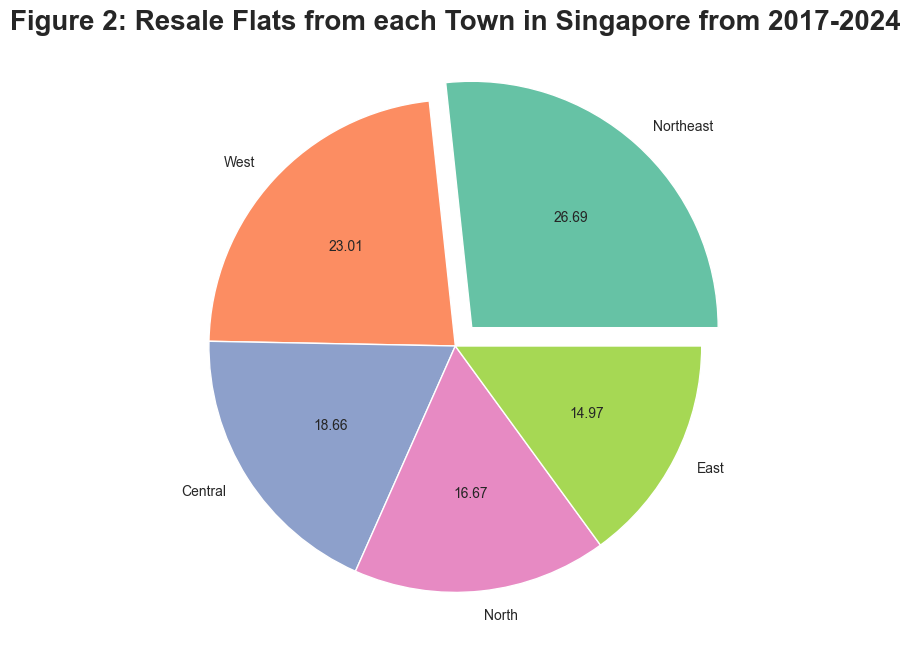

In [20]:

plt.figure(figsize=(18,8))
sns.set_palette(sns.color_palette("Set2",5))

explode = [0.1, 0, 0, 0,0] 
#autopct in python format,# explode takes in array
plt.pie(sales_count,labels=labels,autopct='%.2f',explode=explode)
plt.title('Figure 2: Resale Flats from each Town in Singapore from 2017-2024',weight='bold',size=20)

In [21]:
df.sort_values('flat_type')
matureEstates= ["ANG MO KIO","BEDOK","BISHAN","BUKIT MERAH","BUKIT TIMAH","CENTRAL AREA","CLEMENTI","GEYLANG","KALLANG/WHAMPOA","MARINE PARADE","PASIR RIS","QUEENSTOWN","SERANGOON","TAMPINES","TOA PAYOH"]

def map_mature(x):
    if x in matureEstates:
        return 'Mature Estate'
    else:
        return 'Non-Mature Estates'
    
df['state']=df['town'].map(map_mature)

In [22]:
df['state'].value_counts()

state
Non-Mature Estates    105994
Mature Estate          76239
Name: count, dtype: int64

Text(0, 0.5, 'Number of Flat Resales')

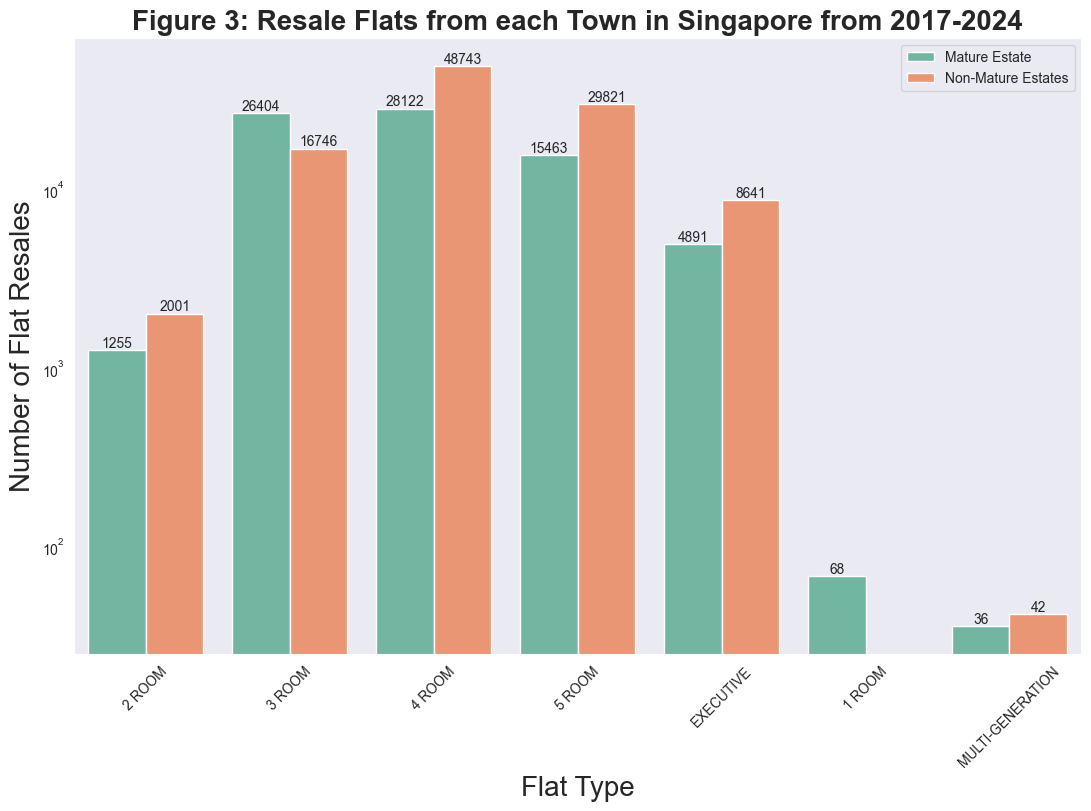

In [26]:
plt.figure(figsize=(13,8))
g=sns.countplot(df,x='flat_type',hue='state')
g.get_legend().set_title('')
for i in g.containers:
    g.bar_label(i)

plt.yscale('log')
plt.title('Figure 3: Resale Flats from each Town in Singapore from 2017-2024',weight='bold',size=20)
plt.xticks(rotation=45)
plt.xlabel('Flat Type',size=20)
plt.ylabel('Number of Flat Resales',size=20)


Resale Flats from Top 3 Town in Singapore from 2017-2024

In [54]:
# By number of resales 
TOP_3_TOWNS=df.groupby('town').agg('count').sort_values('state',ascending=False).reset_index()['town'][:3]
TOP_3_TOWNS=TOP_3_TOWNS.tolist()

In [59]:
top3df=df.loc[df['town'].isin(TOP_3_TOWNS)]

Text(0, 0.5, 'Number of Flat Resales')

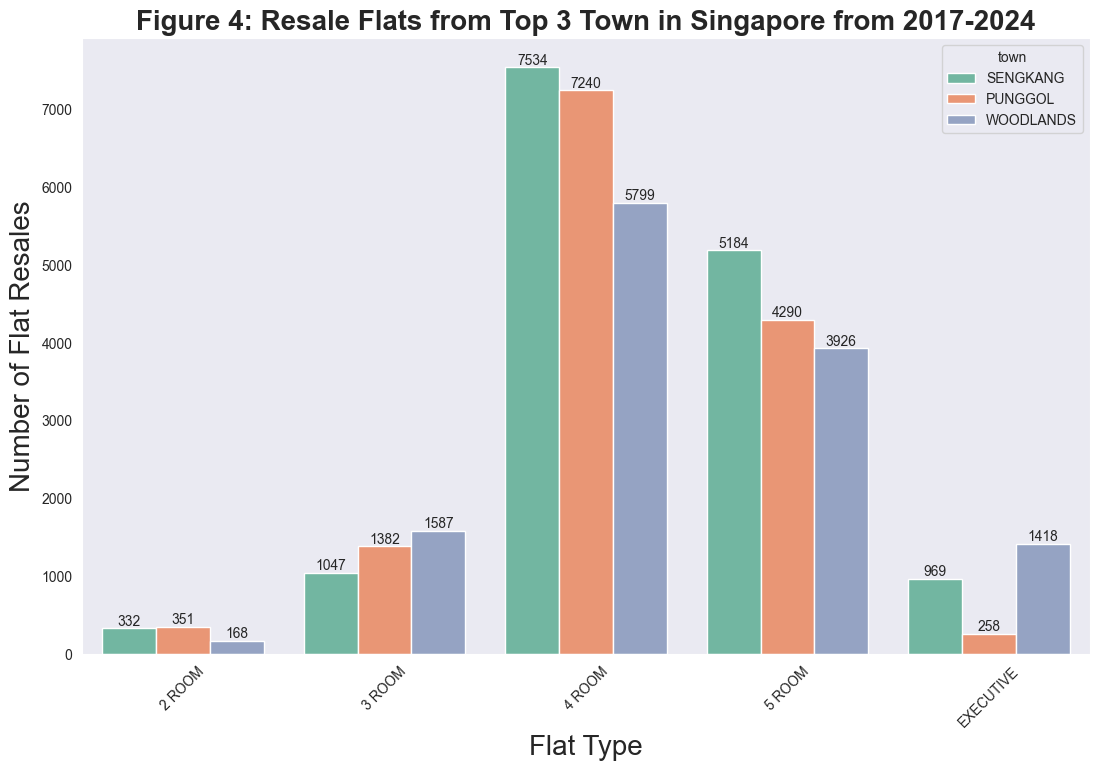

In [67]:
plt.figure(figsize=(13,8))
g=sns.countplot(top3df.sort_values('flat_type'),x='flat_type',hue='town')

for i in g.containers:
    g.bar_label(i)

plt.title('Figure 4: Resale Flats from Top 3 Town in Singapore from 2017-2024',weight='bold',size=20)
plt.xticks(rotation=45)
plt.xlabel('Flat Type',size=20)
plt.ylabel('Number of Flat Resales',size=20)



'4 Room Flats' Resale Price over the Years 2017-2023

In [100]:
#adding new column year

df['year']=df['month'].dt.year

Text(0.5, 1.0, 'Figure 5: "4 Room Flats" Resale Price over the Years 2017 to 2023')

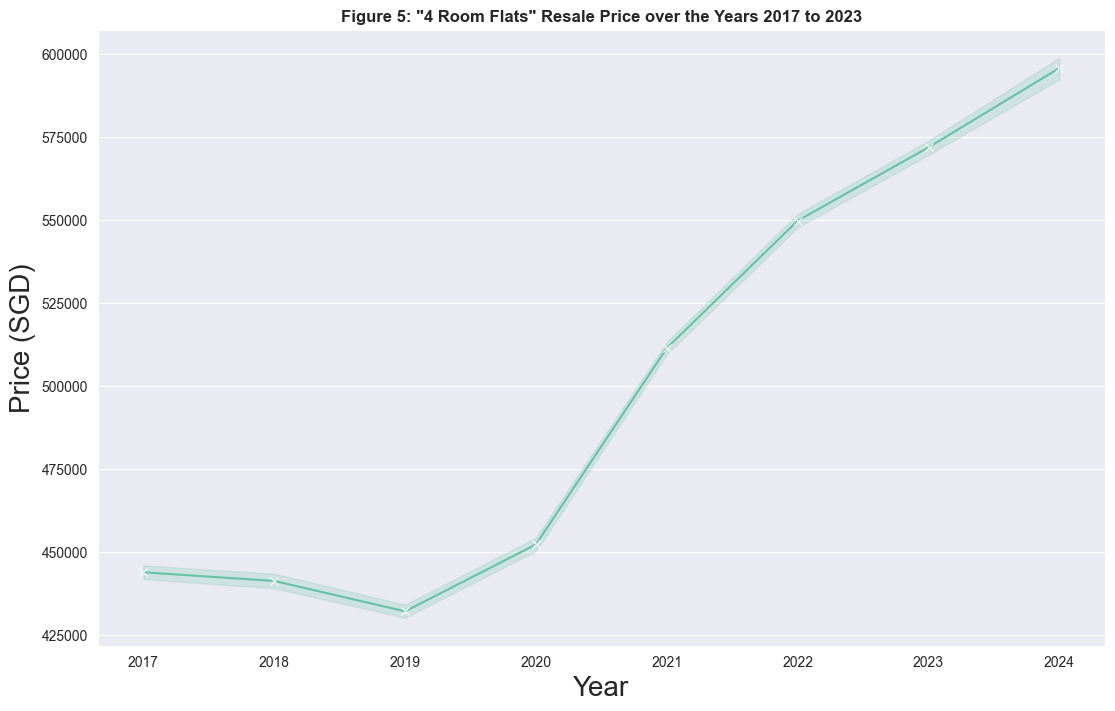

In [105]:
plt.figure(figsize=(13,8))
sns.lineplot(df,x='year',y='resale_price',marker="x")
plt.grid(True,axis="y")
plt.xlabel("Year",size=20)
plt.ylabel("Price (SGD)",size=20)
plt.title("Figure 5: \"4 Room Flats\" Resale Price over the Years 2017 to 2023",weight='bold')


"4 Room Flats" Resale Price Changes over the Months

In [134]:
#mapping months from numeric values to alphabetical form 
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['month_name']=df['month'].dt.month.map(month_map)

#year 2023 only
df_2023=df.query('year==2023')

#year 2018 only
df_2018=df.query('year==2018')

Text(0.5, 0.95, 'Figure 6: "4 Room Flats" Resale Price Changes over the Months')

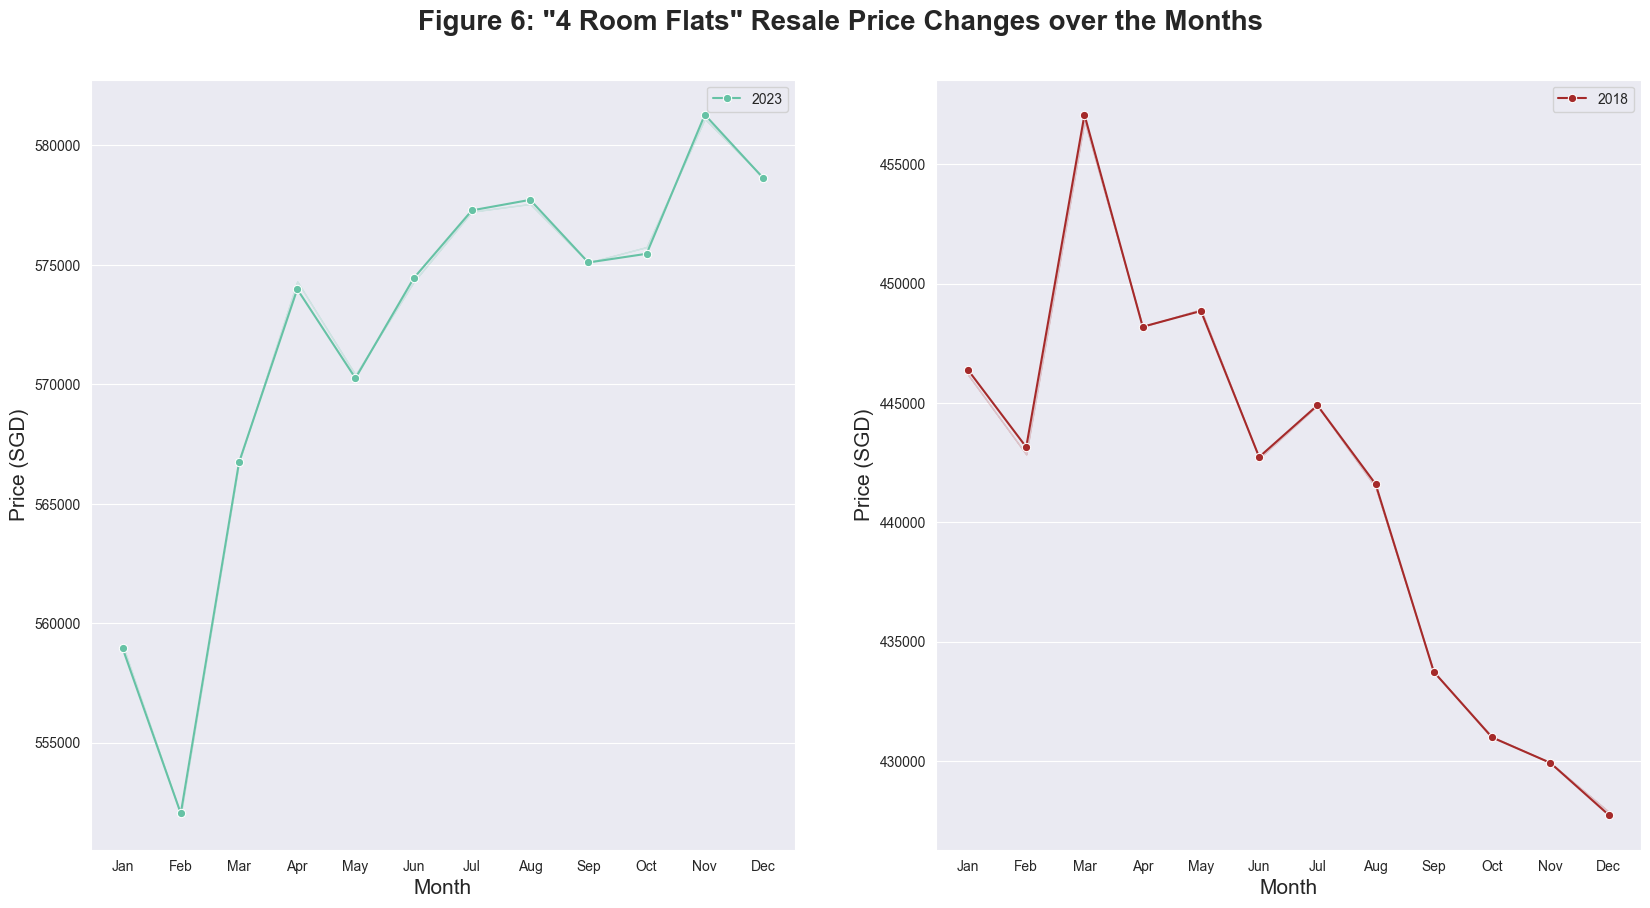

In [154]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

#for ax[0]
sns.lineplot(df_2023,x='month_name',y='resale_price',ax=ax[0],
             errorbar=('ci', False),
             marker='o',label='2023')
ax[0].set_xlabel('Month',size=15)
ax[0].set_ylabel('Price (SGD)',size=15)
ax[0].grid(True,axis='y')
ax[0].legend()

#for ax[1]
sns.lineplot(df_2018,x='month_name',y='resale_price',ax=ax[1],
             errorbar=('ci', False),
             marker='o',label='2018',color='brown')
ax[1].set_xlabel('Month',size=15)
ax[1].set_ylabel('Price (SGD)',size=15)
ax[1].grid(True,axis='y')
ax[1].legend()

plt.suptitle('Figure 6: "4 Room Flats" Resale Price Changes over the Months',size=20,weight='bold',y=0.95)